In [1]:
!pip install seaborn
!pip install mlxtend

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.6 kB 919.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 901.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 958.1 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.6 kB 986.4 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.6 kB 966.0 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 960.6 kB/s eta 0:00:00


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [51]:
X, y = make_moons(100, noise=0.25,random_state=2) # toy dataset with 2 features: 100 samples

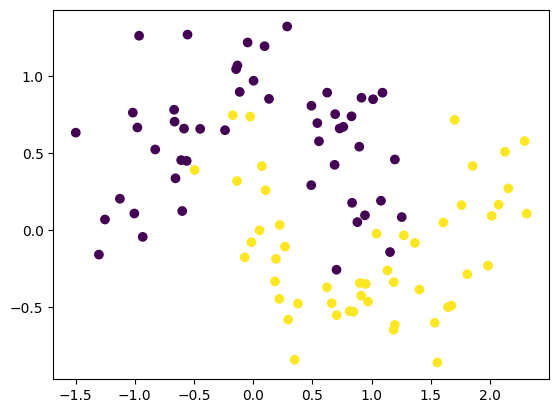

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y) # to generates different colors with  binary values in data
plt.show()

In [53]:
# Generate simple ANN network
model1 = Sequential()
model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               384       
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 4s 446us/step


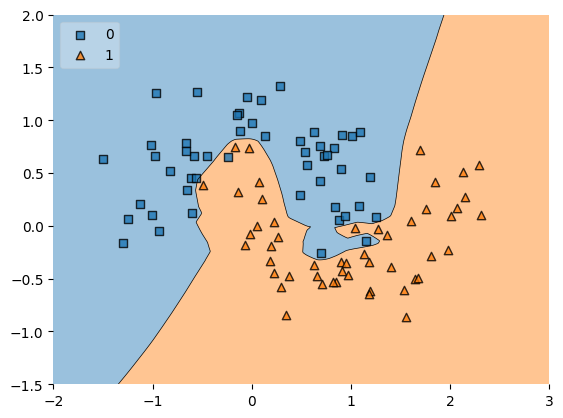

In [54]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, 
metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2) # X is for input data, y=integer labels, clf=model1 trained classifier, legend=2 location of legend point
plt.xlim(-2,3) # sets the limits of the x-axis 
plt.ylim(-1.5,2) # sets the limits of the y-axis
plt.show()

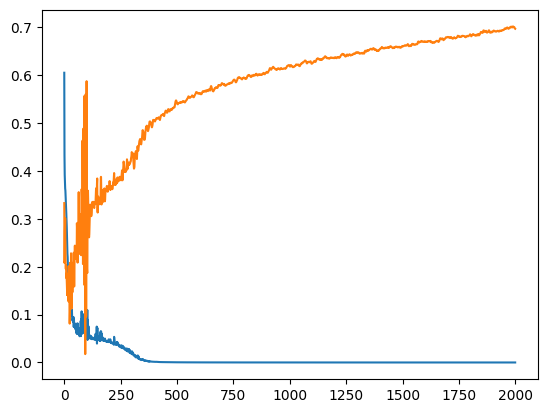

In [55]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [56]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               384       
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 4s 446us/step


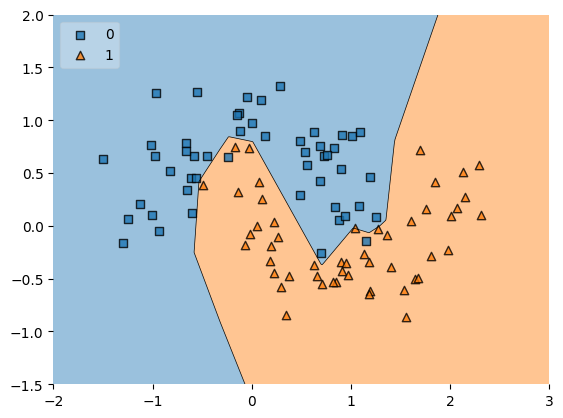

In [57]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, 
metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

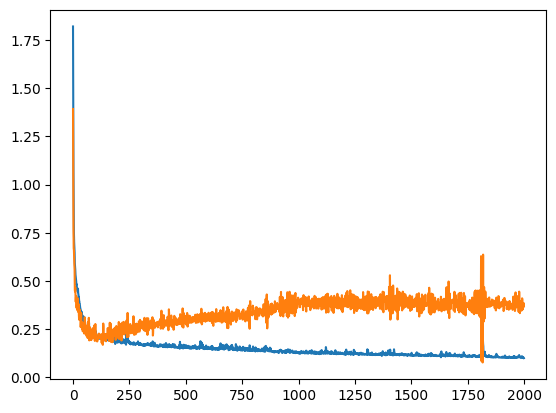

In [58]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [59]:
# Calculation of accuarcy of each model
# Calculate the accuracy for model1
acc_model1 = history1.history['accuracy'][-1] * 100
# Calculate the accuracy for model2
acc_model2 = history2.history['accuracy'][-1] * 100
print(f"Accuracy for Model 1: {acc_model1:.2f}%")
print(f"Accuracy for Model 2: {acc_model2:.2f}%")


Accuracy for Model 1: 100.00%
Accuracy for Model 2: 98.75%
